In [29]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [30]:
df_train = pd.read_csv("train-data.csv")
df_test = pd.read_csv("test-data .csv")

Analysing data

In [31]:
df_train.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [32]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 446.8+ KB


In [33]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1234 non-null   int64  
 1   Name               1234 non-null   object 
 2   Location           1234 non-null   object 
 3   Year               1234 non-null   int64  
 4   Kilometers_Driven  1234 non-null   int64  
 5   Fuel_Type          1234 non-null   object 
 6   Transmission       1234 non-null   object 
 7   Owner_Type         1234 non-null   object 
 8   Mileage            1234 non-null   object 
 9   Engine             1224 non-null   object 
 10  Power              1224 non-null   object 
 11  Seats              1223 non-null   float64
 12  New_Price          182 non-null    object 
dtypes: float64(1), int64(3), object(9)
memory usage: 82.0+ KB


In [34]:
df_train=df_train.drop("New_Price",axis=1)
df_test=df_test.drop("New_Price",axis=1)

In [35]:
df_train.columns

Index(['Unnamed: 0', 'Name', 'Location', 'Year', 'Kilometers_Driven',
       'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power',
       'Seats', 'Price'],
      dtype='object')

In [36]:
df_test.columns

Index(['Unnamed: 0', 'Name', 'Location', 'Year', 'Kilometers_Driven',
       'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power',
       'Seats'],
      dtype='object')

In [37]:
df_train=df_train.drop("Unnamed: 0",axis=1)
df_test=df_test.drop("Unnamed: 0",axis=1)

In [38]:
df_train.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price'],
      dtype='object')

In [39]:
df_test.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats'],
      dtype='object')

In [43]:
df_train.duplicated().sum()

0

NO Duplicate values in dataset

Checking null or nan value value

In [56]:
feature = [feature for feature in df_train.columns]
feature

['Name',
 'Location',
 'Year',
 'Kilometers_Driven',
 'Fuel_Type',
 'Transmission',
 'Owner_Type',
 'Mileage',
 'Engine',
 'Power',
 'Seats',
 'Price']

In [61]:
features = [x for x in feature if df_train[x].isnull().sum()]
features

['Mileage', 'Engine', 'Power', 'Seats']

In [63]:
for feature in features:
    print(feature,df_train[feature].isnull().sum())

Mileage 2
Engine 36
Power 36
Seats 42


droping missing value row

In [64]:
df_train = df_train.dropna()

In [65]:
df_train.shape

(5975, 12)

In [66]:
df_train.nunique()

Name                 1855
Location               11
Year                   22
Kilometers_Driven    3080
Fuel_Type               4
Transmission            2
Owner_Type              4
Mileage               442
Engine                145
Power                 371
Seats                   9
Price                1369
dtype: int64

In [44]:
df_train['Name'].value_counts()

Mahindra XUV500 W8 2WD                          49
Maruti Swift VDI                                45
Honda City 1.5 S MT                             34
Maruti Swift Dzire VDI                          34
Maruti Swift VDI BSIV                           31
                                                ..
Maruti Celerio LDi                               1
Toyota Etios Petrol TRD Sportivo                 1
Land Rover Range Rover Sport 2005 2012 Sport     1
Fiat Petra 1.2 EL                                1
Hyundai Santro LP zipPlus                        1
Name: Name, Length: 1876, dtype: int64

In [77]:
df_train['Location'].value_counts()

Mumbai        784
Hyderabad     741
Kochi         648
Coimbatore    634
Pune          613
Delhi         549
Kolkata       530
Chennai       490
Jaipur        410
Bangalore     353
Ahmedabad     223
Name: Location, dtype: int64

In [46]:
df_train['Year'].value_counts()

2014    797
2015    744
2016    741
2013    649
2017    587
2012    580
2011    466
2010    342
2018    298
2009    198
2008    174
2007    125
2019    102
2006     78
2005     57
2004     31
2003     17
2002     15
2001      8
1998      4
2000      4
1999      2
Name: Year, dtype: int64

First             4929
Second             968
Third              113
Fourth & Above       9
Name: Owner_Type, dtype: int64

In [52]:
df_train['Seats'].value_counts()

5.0     5014
7.0      674
8.0      134
4.0       99
6.0       31
2.0       16
10.0       5
9.0        3
0.0        1
Name: Seats, dtype: int64

In [53]:
df_train['Mileage'].value_counts()

18.9 kmpl     172
17.0 kmpl     172
18.6 kmpl     119
20.36 kmpl     88
21.1 kmpl      86
             ... 
25.5 kmpl       1
21.4 km/kg      1
19.2 km/kg      1
18.18 kmpl      1
17.0 km/kg      1
Name: Mileage, Length: 442, dtype: int64

In [68]:
df_train.describe()

,Year,Kilometers_Driven,Seats,Price
count,5975.000000,5.975000e+03,5975.000000,5975.000000
mean,2013.386778,5.867431e+04,5.278828,9.501647
std,3.247238,9.155851e+04,0.808959,11.205736
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2012.000000,3.390800e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.650000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


Data visulization matplotlib and seaborn

In [69]:
import seaborn as sns

Mumbai        13.121339
Hyderabad     12.401674
Kochi         10.845188
Coimbatore    10.610879
Pune          10.259414
Delhi          9.188285
Kolkata        8.870293
Chennai        8.200837
Jaipur         6.861925
Bangalore      5.907950
Ahmedabad      3.732218
Name: Location, dtype: float64
Mumbai        784
Hyderabad     741
Kochi         648
Coimbatore    634
Pune          613
Delhi         549
Kolkata       530
Chennai       490
Jaipur        410
Bangalore     353
Ahmedabad     223
Name: Location, dtype: int64


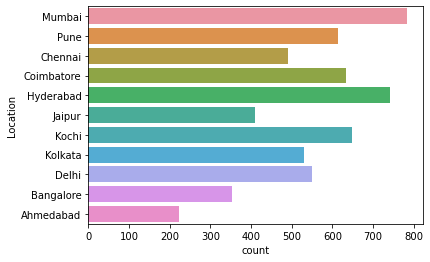

In [88]:
print(df_train["Location"].value_counts(normalize=True)*100)
sns.countplot(y='Location',data = df_train)
print(df_train['Location'].value_counts())

2014    795
2015    741
2016    740
2013    648
2017    586
2012    572
2011    461
2010    339
2018    298
2009    196
2008    169
2007    123
2019    102
2006     75
2005     55
2004     29
2003     15
2002     14
2001      7
1998      4
2000      4
1999      2
Name: Year, dtype: int64

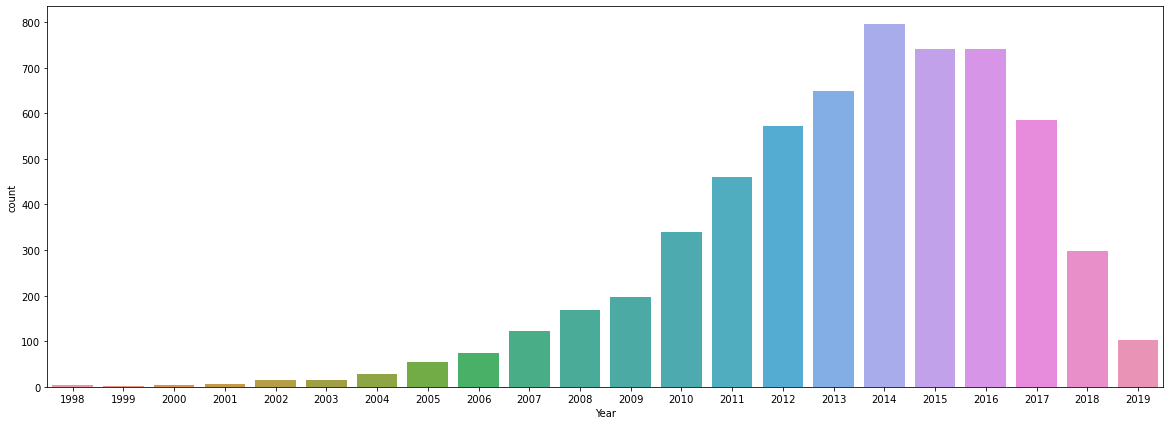

In [89]:
fig,ax=plt.subplots(figsize=(20,7))
sns.countplot(x='Year',data=df_train)
df_train['Year'].value_counts()

Diesel    3195
Petrol    2714
CNG         56
LPG         10
Name: Fuel_Type, dtype: int64

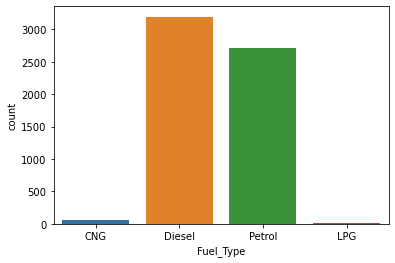

In [90]:
sns.countplot(x='Fuel_Type',data=df_train)
df_train['Fuel_Type'].value_counts()

Manual       4266
Automatic    1709
Name: Transmission, dtype: int64

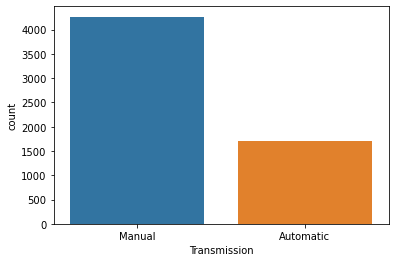

In [92]:
sns.countplot(x="Transmission",data=df_train)
df_train['Transmission'].value_counts()

First             4903
Second             953
Third              111
Fourth & Above       8
Name: Owner_Type, dtype: int64

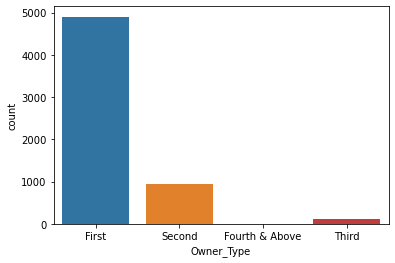

In [93]:
sns.countplot(x="Owner_Type",data=df_train)
df_train['Owner_Type'].value_counts()

5.0     5012
7.0      674
8.0      134
4.0       99
6.0       31
2.0       16
10.0       5
9.0        3
0.0        1
Name: Seats, dtype: int64


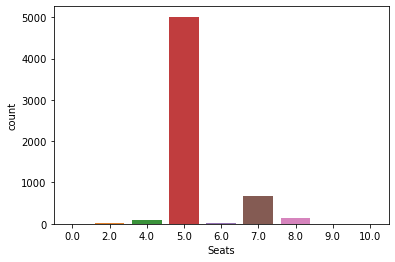

In [94]:
sns.countplot(x='Seats',data=df_train)
print(df_train.Seats.value_counts())

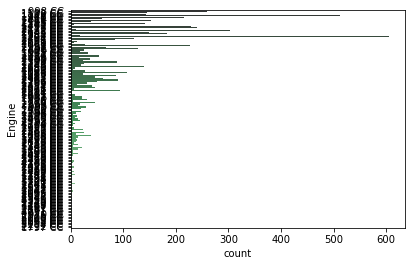

In [97]:
sns.countplot(y="Engine", data=df_train, palette="Greens_d")

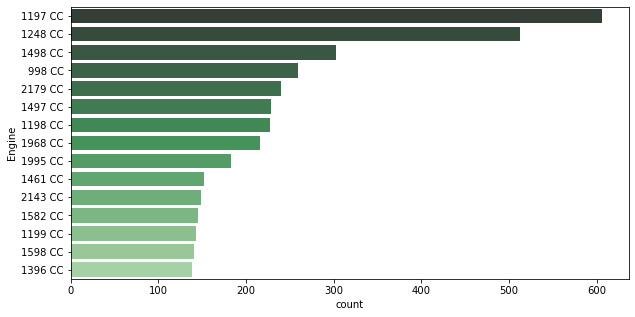

In [104]:
fig,ax=plt.subplots(figsize=(10,5))
sns.countplot(y="Engine", data=df_train, palette="Greens_d",
              order=df_train.Engine.value_counts().iloc[:15].index)

In [138]:
df_train.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
Price                float64
dtype: object

check all parameter with dtypes is abject

In [140]:
df_train['Location'].values

array(['Mumbai', 'Pune', 'Chennai', ..., 'Jaipur', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [141]:
df_train['Fuel_Type'].values

array(['CNG', 'Diesel', 'Petrol', ..., 'Diesel', 'Petrol', 'Diesel'],
      dtype=object)

In [145]:
df_train['Transmission'].values

array(['Manual', 'Manual', 'Manual', ..., 'Manual', 'Manual', 'Manual'],
      dtype=object)

In [146]:
df_train['Owner_Type'].values

array(['First', 'First', 'First', ..., 'Second', 'First', 'First'],
      dtype=object)

In [147]:
df_train['Mileage'].values

array(['26.6 km/kg', '19.67 kmpl', '18.2 kmpl', ..., '14.0 kmpl',
       '18.9 kmpl', '25.44 kmpl'], dtype=object)

In [148]:
df_train['Power'].values

array(['58.16 bhp', '126.2 bhp', '88.7 bhp', ..., '112 bhp', '67.1 bhp',
       '57.6 bhp'], dtype=object)

In [149]:
df_train['Engine'].values

array(['998 CC', '1582 CC', '1199 CC', ..., '2498 CC', '998 CC', '936 CC'],
      dtype=object)

In [150]:
df_train['Power_n'] = df_train['Power'].str.extract(r'(\d+.\d+)').astype('float')

In [151]:
df_train['Mileage_n']=df_train["Mileage"].str.extract(r'(\d+.\d+)').astype('float')

In [156]:
df_train['Engine_n']=df_train['Engine'].str.extract(r'(\d+)').astype("int")

In [158]:
df_train['Seat_n'] = df_train["Seats"].astype("int")

In [161]:
df_train['Power_n'].values

array([ 58.16, 126.2 ,  88.7 , ..., 112.  ,  67.1 ,  57.6 ])

In [164]:
df_train['Engine_n'].values

array([ 998, 1582, 1199, ..., 2498,  998,  936])

In [166]:
df_train['Mileage_n'].values

array([26.6 , 19.67, 18.2 , ..., 14.  , 18.9 , 25.44])

In [168]:
df_train['Seat_n'].values

array([5, 5, 5, ..., 8, 5, 5])

#Countinuous feature and outlinear 

In [169]:
featur_continuous=['Price','Kilometers_Driven']

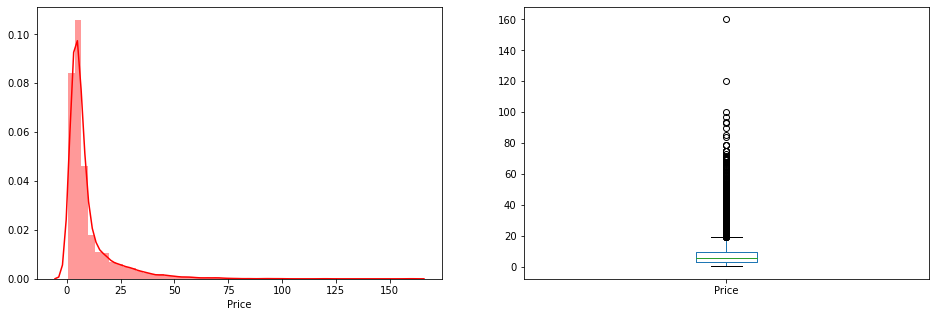

In [181]:
#price
plt.subplot(121)
sns.distplot(df_train['Price'],color="r");

plt.subplot(122)
df_train['Price'].plot.box(figsize=(16,5))

plt.show()


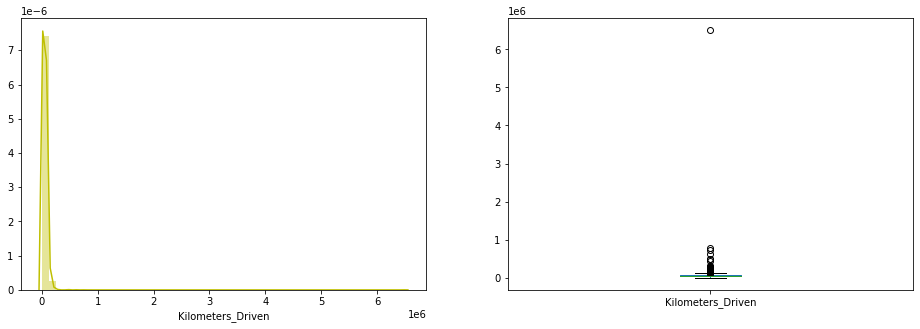

In [183]:
#price
plt.subplot(121)
sns.distplot(df_train['Kilometers_Driven'],color="y");

plt.subplot(122)
df_train['Kilometers_Driven'].plot.box(figsize=(16,5))

plt.show()

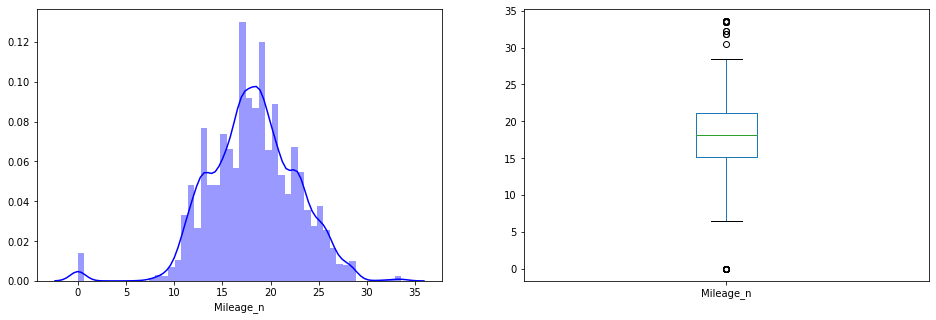

In [187]:
#milage
plt.subplot(121)
sns.distplot(df_train['Mileage_n'],color="b");

plt.subplot(122)
df_train['Mileage_n'].plot.box(figsize=(16,5))

plt.show()

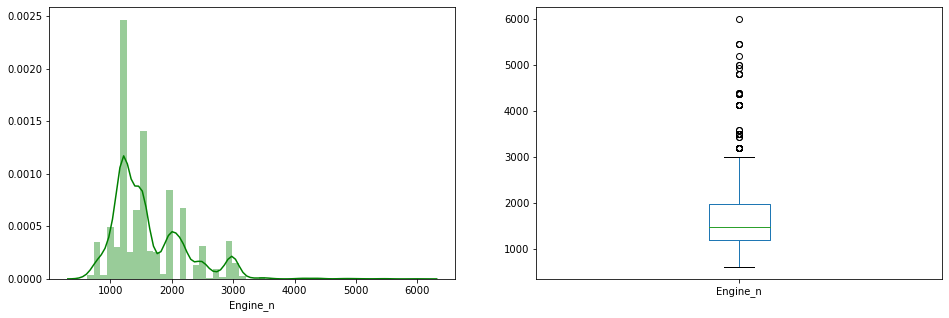

In [189]:
#engine cc
plt.subplot(121)
sns.distplot(df_train['Engine_n'],color="g");

plt.subplot(122)
df_train['Engine_n'].plot.box(figsize=(16,5))

plt.show()

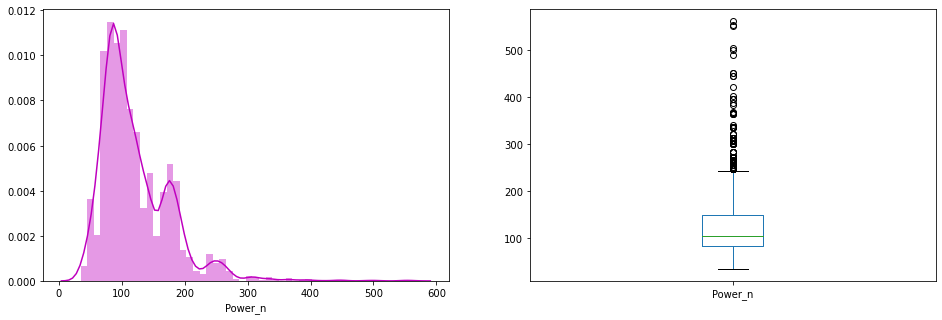

In [192]:
#power
plt.subplot(121)
sns.distplot(df_train['Power_n'],color="m");

plt.subplot(122)
df_train['Power_n'].plot.box(figsize=(16,5))

plt.show()


Bivarient analysis

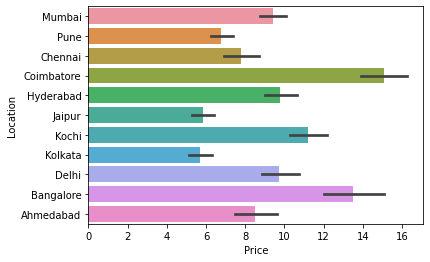

In [194]:
#location vs price

sns.barplot(y="Location", x="Price", data=df_train)

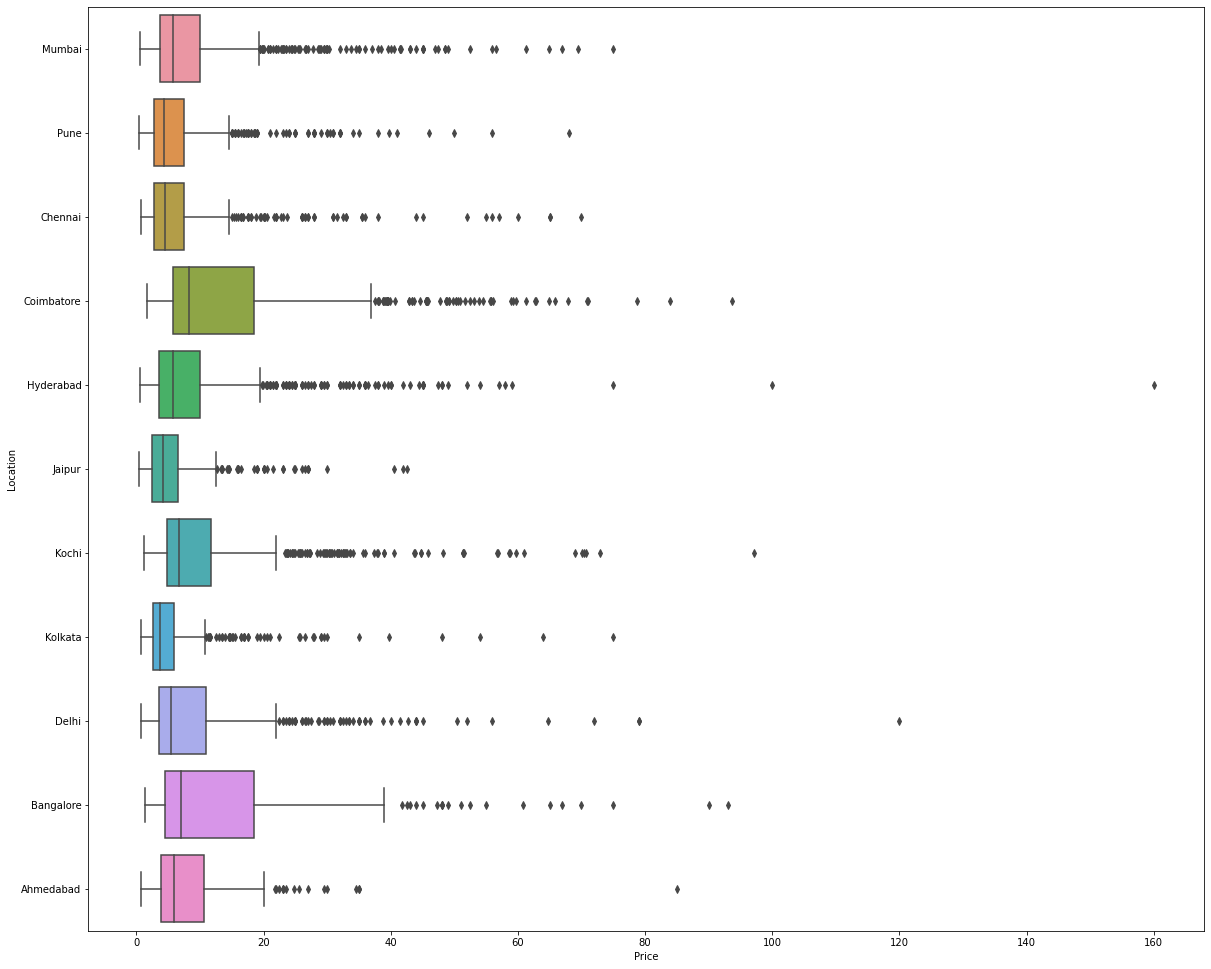

In [199]:
fig_dims = (20, 17)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(x="Price", y="Location", data=df_train )

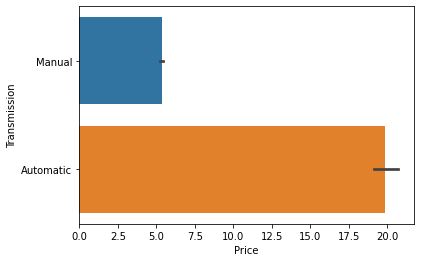

In [203]:
#Transmission vs Price
sns.barplot(y="Transmission", x="Price", data=df_train)

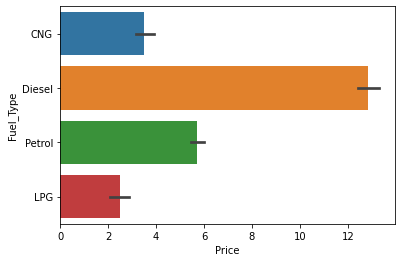

In [204]:
# fuel type vs price
sns.barplot(y="Fuel_Type", x="Price", data=df_train)


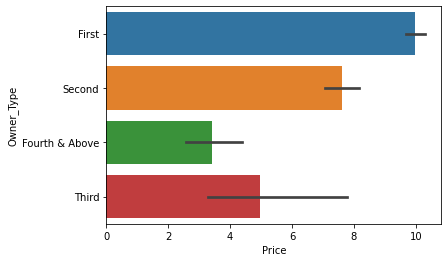

In [205]:
#Owner_Type vs price
sns.barplot(y="Owner_Type", x="Price", data=df_train)

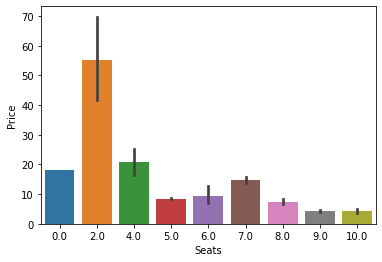

In [207]:
#seat vs Price
sns.barplot(x='Seats',y='Price',data=df_train)

# split full car name into company and Model name

In [222]:
company = []
model = []
Name= list(df_train['Name'])

In [223]:
for i in Name:
    i=i.split(" ",1)
    company.append(i[0])
    model.append(i[1])

In [224]:
df_train["Company"] = company
df_train["Model"] = model

In [225]:
df_train.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price', 'Power_n', 'Mileage_n', 'Engine_n', 'Seat_n', 'Company',
       'Model'],
      dtype='object')

In [226]:
df_train['Company'].nunique()

31

In [227]:
df_train['Model'].nunique()

1855

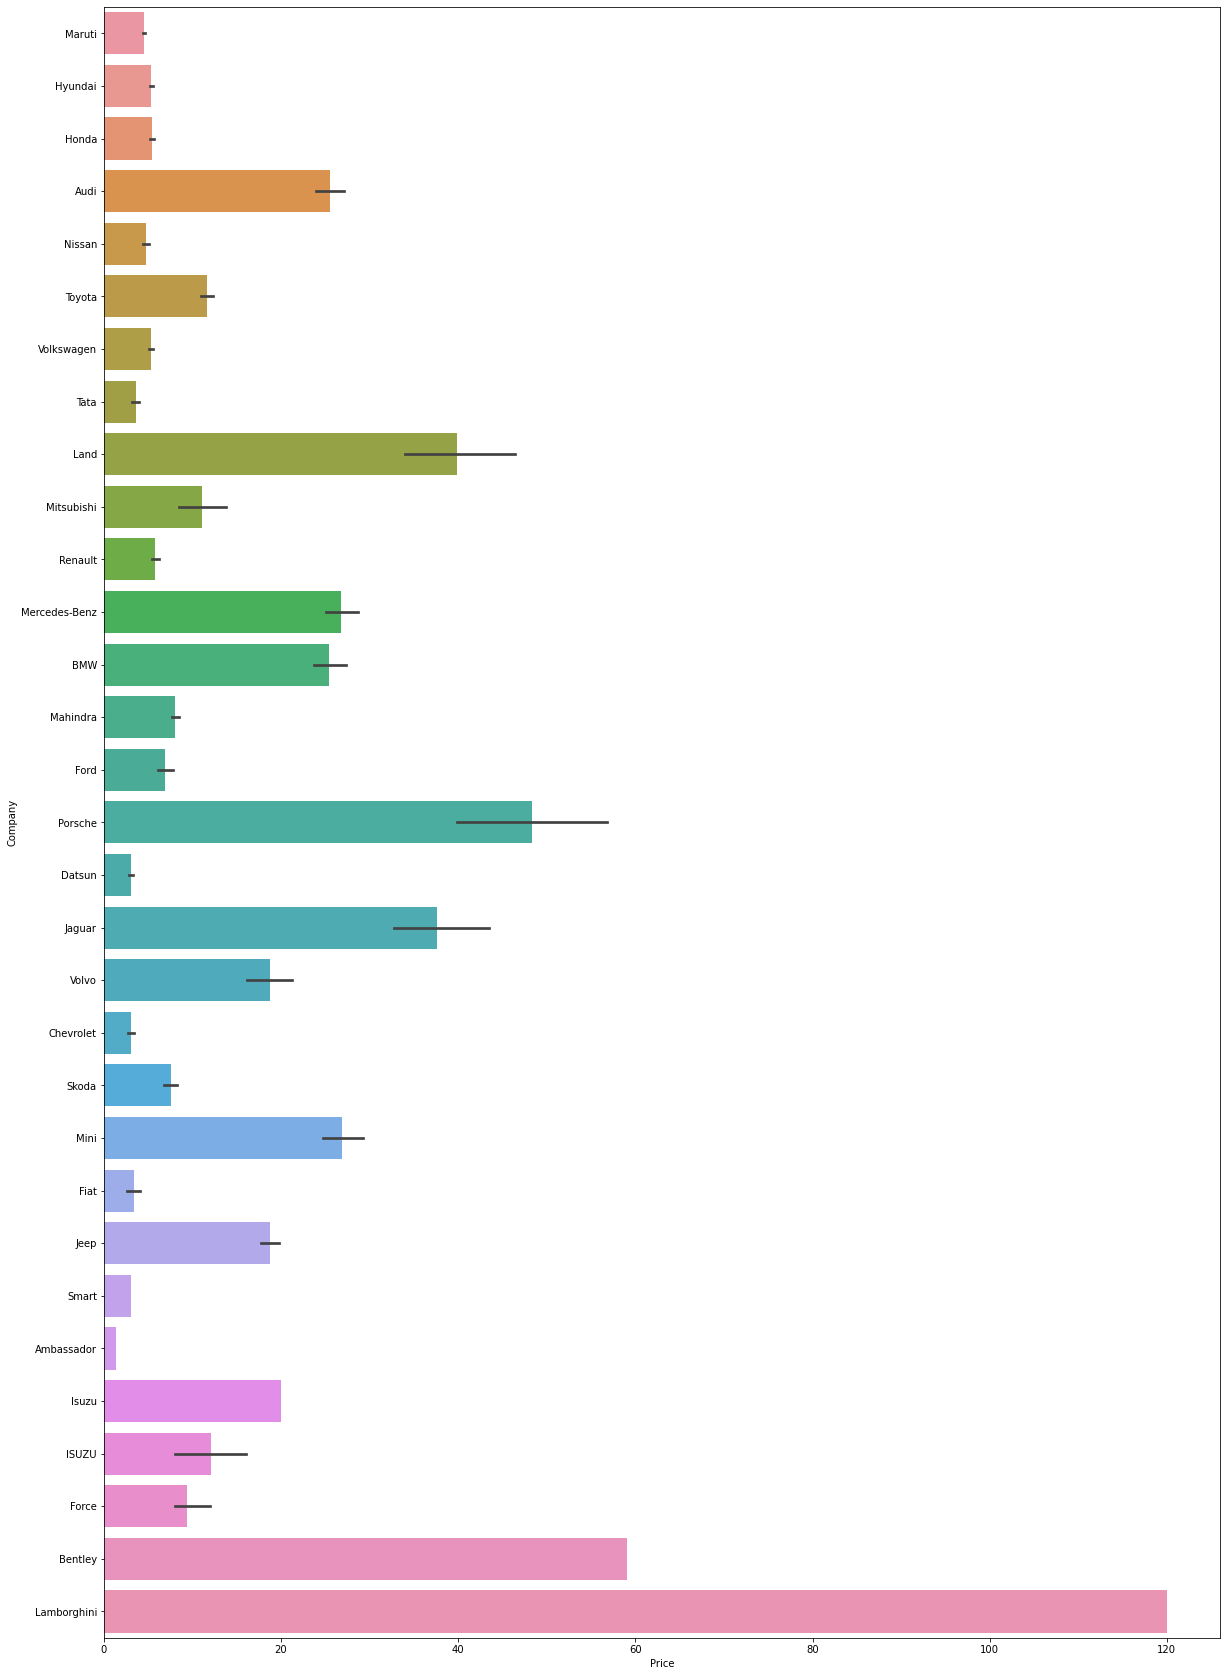

In [228]:
fig_dims = (20, 30)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(y="Company", x="Price", data=df_train)

continues feaatuare and price visulization
scatter plot

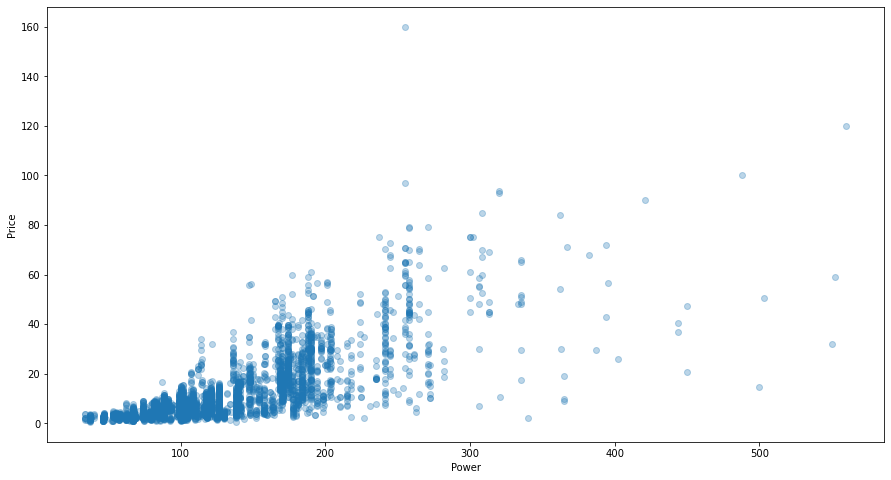

In [233]:
#Power vs Price
plt.figure(figsize=(15,8))
plt.scatter(df_train['Power_n'],df_train['Price'],alpha=0.3)
plt.xlabel("Power")
plt.ylabel('Price')
plt.show()

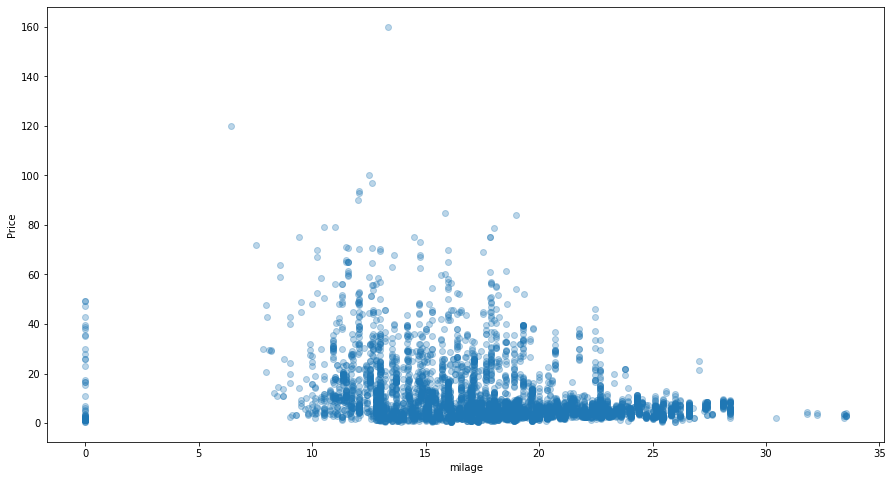

In [234]:
#Mileaage vs Price
plt.figure(figsize=(15,8))
plt.scatter(df_train['Mileage_n'],df_train['Price'],alpha=0.3)
plt.xlabel("milage")
plt.ylabel('Price')
plt.show()

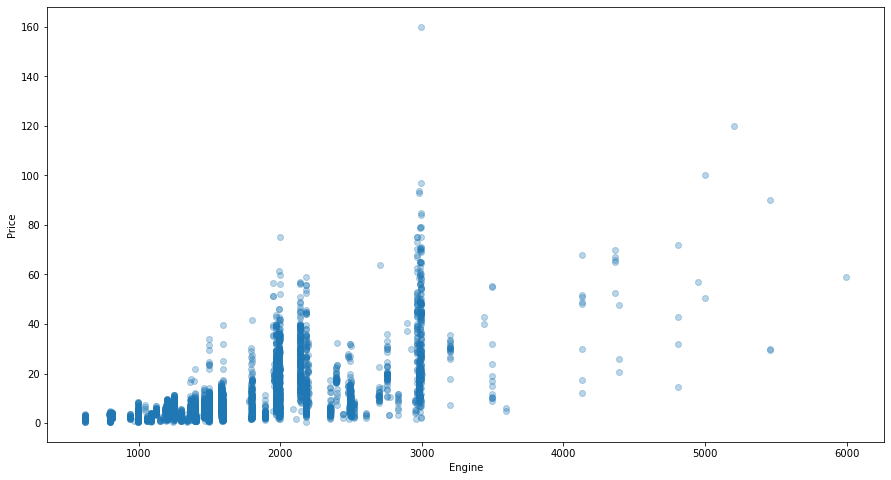

In [235]:
#Engine vs Price
plt.figure(figsize=(15,8))
plt.scatter(df_train['Engine_n'],df_train['Price'],alpha=0.3)
plt.xlabel("Engine")
plt.ylabel('Price')
plt.show()

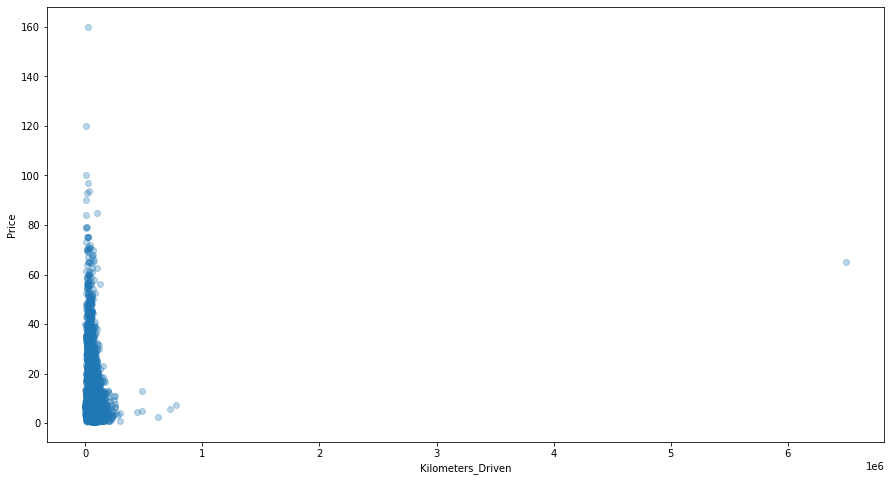

In [236]:
#Kilometers_Driven vs Price
plt.figure(figsize=(15,8))
plt.scatter(df_train['Kilometers_Driven'],df_train['Price'],alpha=0.3)
plt.xlabel("Kilometers_Driven")
plt.ylabel('Price')
plt.show()

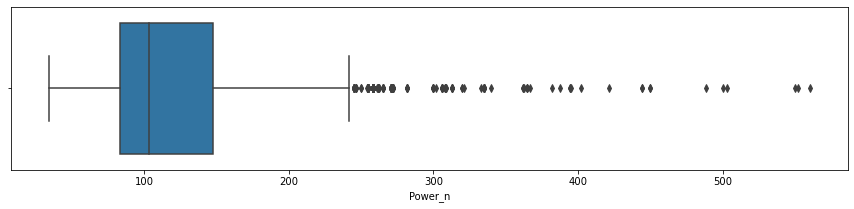

In [239]:
#Power
fig, ax = plt.subplots()
fig.set_size_inches(15,3)
sns.boxplot(x='Power_n',data=df_train,ax=ax)

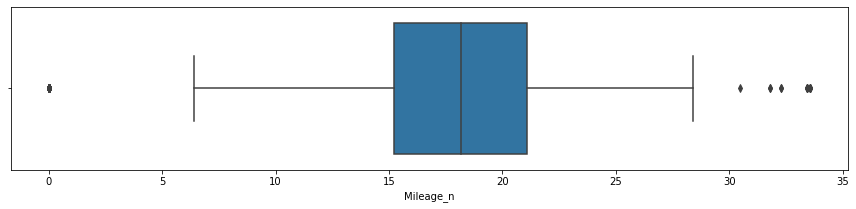

In [240]:
#MIleage
fig, ax = plt.subplots()
fig.set_size_inches(15,3)
sns.boxplot(x='Mileage_n',data=df_train,ax=ax)

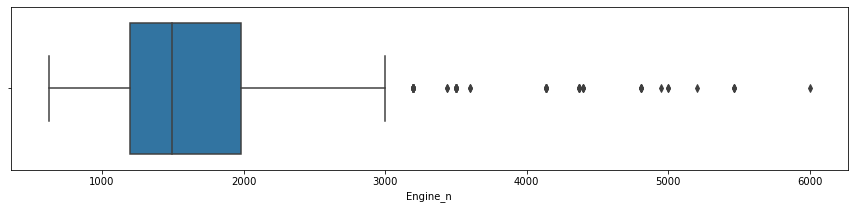

In [241]:
#Engine 
fig, ax = plt.subplots()
fig.set_size_inches(15,3)
sns.boxplot(x='Engine_n',data=df_train,ax=ax)

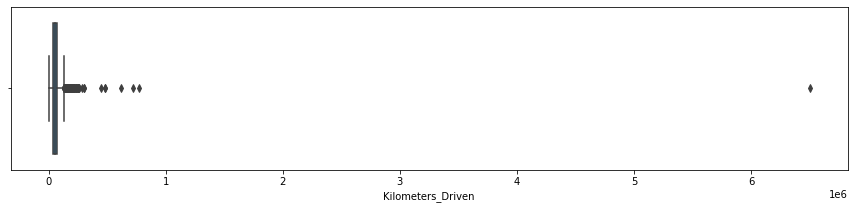

In [242]:
#Kilometers_Driven
fig, ax = plt.subplots()
fig.set_size_inches(15,3)
sns.boxplot(x='Kilometers_Driven',data=df_train,ax=ax)